# SPRINT 3 - MACHINE LEARNING

GRUPO: Echo Script


DISCENTES - RM :

Caiky de ávila Pereira Dutra (representante) - 99274

Giovanna Shiguemori Barbosa - 99105

Isabela Victória de Novais Romanato - 550234

Lucas Pinheiro de Souza - 99061

Yann Dantas - 550783


Orientador: ME. Fernando Nemec

# Licenças
* https://raw.githubusercontent.com/x4nth055/pythoncode-tutorials/master/machine-learning/customer-churn-detection/Churn_Modelling.csv

* É importante notar que para o cálculo de rotatividade de clientes foi usado uma base ficticia, pois os dados utilizados para essa análise podem ser privados, mas podemos aplicar o mesmo cálculo para exemplos na vida real

# Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

* Base de dados usadas

In [2]:
salarios = pd.read_csv('/content/contracheque.csv')
df = pd.read_csv('/content/churn_modelling.csv')

* Aqui iremos dropar as colunas que serão usados e usar apenas o número de registros para esta análise

In [3]:
salarios.dropna(inplace=True)
salarios = salarios[['rendimento_liquido', 'total_de_descontos']]
salarios = salarios.sample(n=1000)
salarios.reset_index(drop=True, inplace=True)

* Aqui iremos ter uma noção de como irá ficar nossa base de dados, para obtenção saldo foi usada as colunas salário subtraido pela coluna de despesas

In [4]:
df = df.drop(['Geography','Gender', 'Surname', 'HasCrCard', 'EstimatedSalary', 'Balance', 'CustomerId'], axis=1)
sistemas = ['ERP PROTHEUS', 'ERP DATASUL', 'ERP RM', 'ERP LOGIX']
sistemas_aleatorios = random.choices(sistemas, k=len(df))
df['Sistema mais comprado'] = sistemas_aleatorios
df = pd.concat([df, salarios], axis=1)
df.dropna(inplace=True)
df.rename(columns={'CreditScore': 'Score Credito', 'Age': 'Idade', 'Tenure': 'Permanencia',
                   'NumOfProducts': 'NumProdutos',
                   'IsActiveMember': 'Membro ativo', 'Exited': 'Abandono',
                   'nome': 'Nome', 'sexo': 'Genero', 'rendimento_liquido': 'Salario', 'total_de_descontos': 'Despesas', 'Security Name': 'Empresa'}, inplace=True)
df['Despesas'] = df['Despesas'].abs()
df['Saldo'] = df['Salario'] - df['Despesas']
df = df.head(80)
df

,RowNumber,Score Credito,Idade,Permanencia,NumProdutos,Membro ativo,Abandono,Sistema mais comprado,Salario,Despesas,Saldo
0,1,619,42,2,1,1,1,ERP PROTHEUS,26959.56,12793.38,14166.18
1,2,608,41,1,1,1,0,ERP LOGIX,34185.01,9236.32,24948.69
2,3,502,42,8,3,0,1,ERP PROTHEUS,25394.27,9295.51,16098.76
3,4,699,39,1,2,0,0,ERP PROTHEUS,42279.53,14650.66,27628.87
4,5,850,43,2,1,1,0,ERP PROTHEUS,28809.06,10705.60,18103.46
...,...,...,...,...,...,...,...,...,...,...,...
75,76,735,21,1,2,0,0,ERP DATASUL,29744.40,9940.26,19804.14
76,77,664,55,8,2,1,0,ERP RM,44360.28,20495.99,23864.29
77,78,678,32,9,1,1,0,ERP DATASUL,27197.32,18345.14,8852.18
78,79,757,33,5,1,1,0,ERP PROTHEUS,19446.88,8053.29,11393.59


* Análise exploratória dos Dados

In [5]:
df.describe(exclude= ['O'])
df.describe(include = ['O'])

,Sistema mais comprado
count,80
unique,4
top,ERP RM
freq,24


In [6]:
df.shape[0], df.RowNumber.nunique()

(80, 80)

* Número de clientes que abandonaram a empresa

In [7]:
df['Abandono'].value_counts()

,count
Abandono,
0,64
1,16


* Avaliando a taxa de abandono pleo sistema que a empresa oferece

In [8]:
df.groupby(['Sistema mais comprado']).agg({'RowNumber': 'count', 'Abandono': 'mean'}
                           ).reset_index().sort_values(by='RowNumber', ascending=False)

,Sistema mais comprado,RowNumber,Abandono
3,ERP RM,24,0.291667
1,ERP LOGIX,21,0.047619
2,ERP PROTHEUS,20,0.250000
0,ERP DATASUL,15,0.200000


<Axes: ylabel='Score Credito'>

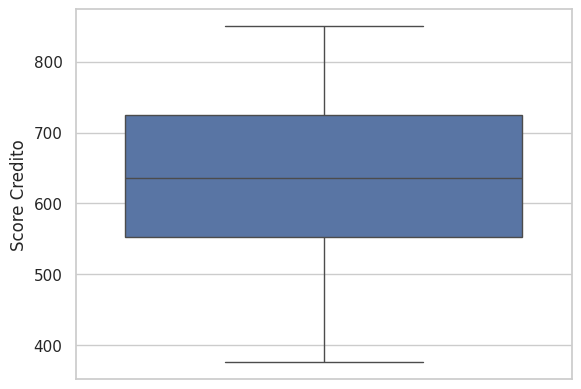

In [9]:
sns.set(style='whitegrid')
sns.boxplot(y=df['Score Credito'])

<Axes: ylabel='Idade'>

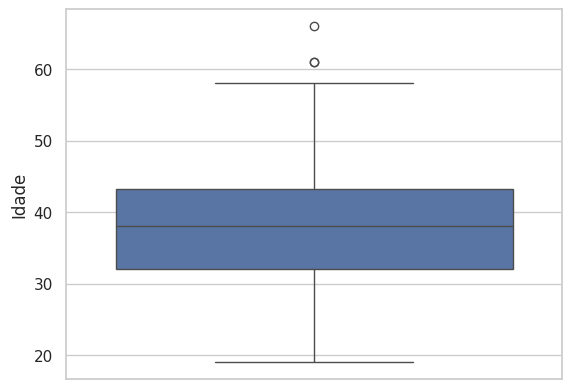

In [10]:
sns.boxplot(y=df['Idade'])

<Axes: ylabel='Permanencia'>

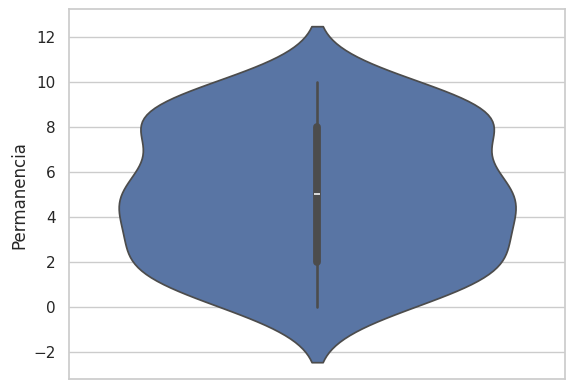

In [11]:
sns.violinplot(y= df.Permanencia)

<Axes: ylabel='Saldo'>

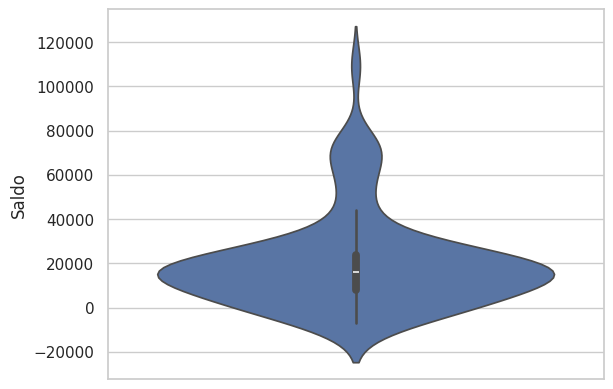

In [12]:
sns.violinplot(y= df.Saldo)

<Axes: xlabel='NumProdutos', ylabel='count'>

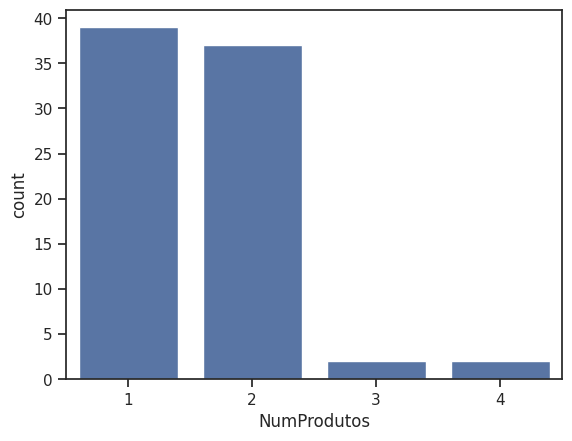

In [13]:
sns.set(style= 'ticks')
sns.countplot(x='NumProdutos', data=df)

<Axes: xlabel='Salario', ylabel='Density'>

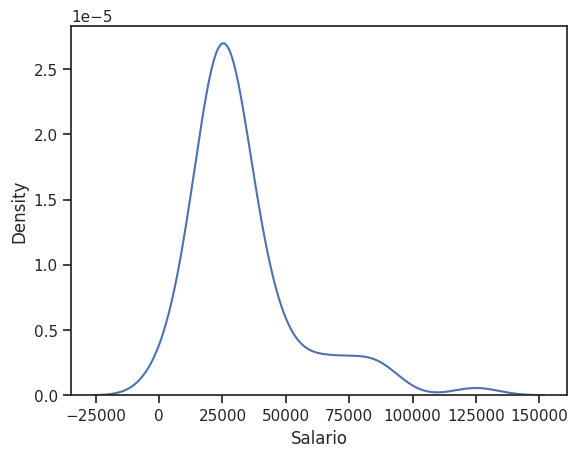

In [14]:
sns.kdeplot(df['Salario'])

In [15]:
# alvo = ['Abandono']

In [16]:
df['Membro ativo'] = df['Membro ativo'].apply(lambda x: 'Sim' if x == 1 else 'Não')
df['Abandono'] = df['Abandono'].apply(lambda x: 'Sim' if x == 1 else 'Não')
df.to_csv('Score.csv', sep=',', index=False)
df

,RowNumber,Score Credito,Idade,Permanencia,NumProdutos,Membro ativo,Abandono,Sistema mais comprado,Salario,Despesas,Saldo
0,1,619,42,2,1,Sim,Sim,ERP PROTHEUS,26959.56,12793.38,14166.18
1,2,608,41,1,1,Sim,Não,ERP LOGIX,34185.01,9236.32,24948.69
2,3,502,42,8,3,Não,Sim,ERP PROTHEUS,25394.27,9295.51,16098.76
3,4,699,39,1,2,Não,Não,ERP PROTHEUS,42279.53,14650.66,27628.87
4,5,850,43,2,1,Sim,Não,ERP PROTHEUS,28809.06,10705.60,18103.46
...,...,...,...,...,...,...,...,...,...,...,...
75,76,735,21,1,2,Não,Não,ERP DATASUL,29744.40,9940.26,19804.14
76,77,664,55,8,2,Sim,Não,ERP RM,44360.28,20495.99,23864.29
77,78,678,32,9,1,Sim,Não,ERP DATASUL,27197.32,18345.14,8852.18
78,79,757,33,5,1,Sim,Não,ERP PROTHEUS,19446.88,8053.29,11393.59


In [17]:
df['Membro ativo'] = df['Membro ativo'].apply(lambda x: 1 if x == 'Sim' else 0)
df['Abandono'] = df['Abandono'].apply(lambda x: 1 if x == 'Sim' else 0)


In [18]:
df1 = df.copy()
del df1['RowNumber']
del df1['Sistema mais comprado']
df1

,Score Credito,Idade,Permanencia,NumProdutos,Membro ativo,Abandono,Salario,Despesas,Saldo
0,619,42,2,1,1,1,26959.56,12793.38,14166.18
1,608,41,1,1,1,0,34185.01,9236.32,24948.69
2,502,42,8,3,0,1,25394.27,9295.51,16098.76
3,699,39,1,2,0,0,42279.53,14650.66,27628.87
4,850,43,2,1,1,0,28809.06,10705.60,18103.46
...,...,...,...,...,...,...,...,...,...
75,735,21,1,2,0,0,29744.40,9940.26,19804.14
76,664,55,8,2,1,0,44360.28,20495.99,23864.29
77,678,32,9,1,1,0,27197.32,18345.14,8852.18
78,757,33,5,1,1,0,19446.88,8053.29,11393.59


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = ['Score Credito', 'Idade', 'Permanencia', 'NumProdutos',
            'Saldo', 'Membro ativo']
target = 'Abandono'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n {conf_matrix}')
print(f'Relatório de Classificação:\n {class_report}')

Acurácia: 0.6875
Matriz de Confusão:
 [[11  0]
 [ 5  0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       0.00      0.00      0.00         5

    accuracy                           0.69        16
   macro avg       0.34      0.50      0.41        16
weighted avg       0.47      0.69      0.56        16



* O modelo tem um desempenho muito desigual, enquanto lele é capaz de classificar a Classe 0 com precisão de 69%, ele não consegue corretamente a classe 1, o modelo pode ser melhorado com técnica de balanceamento entre as classes

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Árvore de Decisão
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Avaliação da Árvore de Decisão
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_conf_matrix = confusion_matrix(y_test, tree_pred)
tree_class_report = classification_report(y_test, tree_pred)

print("----- Árvore de Decisão -----")
print(f'Acurácia: {tree_accuracy}')
print(f'Matriz de Confusão:\n {tree_conf_matrix}')
print(f'Relatório de Classificação:\n {tree_class_report}')

----- Árvore de Decisão -----
Acurácia: 0.75
Matriz de Confusão:
 [[9 2]
 [2 3]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.60      0.60      0.60         5

    accuracy                           0.75        16
   macro avg       0.71      0.71      0.71        16
weighted avg       0.75      0.75      0.75        16



* Isso significa que o modelo classificou corretamente 75% das amostras do conjunto de dados, 82% das amostras classificadas como pertencentes a classe 0, para classificação de 1, ele obteve um score de 60% o que é considerado um desempenho razoável

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Avaliação do Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_class_report = classification_report(y_test, rf_pred)

print("----- Random Forest -----")
print(f'Acurácia: {rf_accuracy}')
print(f'Matriz de Confusão:\n {rf_conf_matrix}')
print(f'Relatório de Classificação:\n {rf_class_report}')

----- Random Forest -----
Acurácia: 0.75
Matriz de Confusão:
 [[11  0]
 [ 4  1]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.20      0.33         5

    accuracy                           0.75        16
   macro avg       0.87      0.60      0.59        16
weighted avg       0.82      0.75      0.69        16



* A acurácia geral do modelo é 75%, isso significa que o modelo classificou corretamente 75% das amostras, podemos novamente ter um desempenho desigual entre as classes, o modelo teria que ser ajustado para performar melhor com a classe 1